# Train travel time

Train rides can turn into an odysee: Trains get delayed, you miss your connection and one thing leads to another. For a simple estimation we will use randify to estimate the total travel time of an example train ride consisting of two legs.

In [1]:
from randify import randify, RandomVariable, plot_pdf
import numpy as np

@randify(verbose=True)
def travel_time(duration_leg_1, duration_leg_2):
    t_arrive_connection = duration_leg_1
    t_start_connection = np.ceil(t_arrive_connection) # connection trains runs every 1 hour, so we round up
    t_arrive_destination = t_start_connection + duration_leg_2
    return t_arrive_destination

Now we define the durations for both legs as RandomVariables. As trains are almost never to early, but often delayed, we use the Weibull distribution to model the durations of the two legs. 

Randify: 31249 samples evaluated in 0.190s.
Expected travel time: 1.99 hours


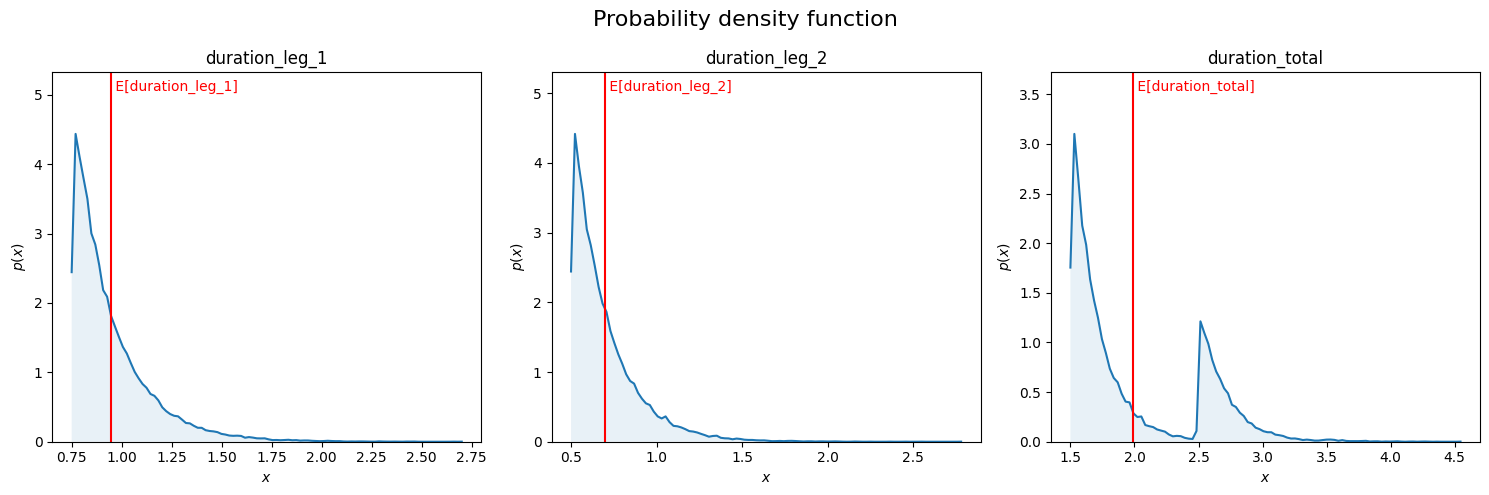

In [11]:
duration_leg_1 = RandomVariable(lambda: 0.75 + 0.2*np.random.weibull(1))
duration_leg_2 = RandomVariable(lambda: 0.5 + 0.2*np.random.weibull(1))

duration_total = travel_time(duration_leg_1, duration_leg_2)
print(f"Expected travel time: {duration_total.expected_value:.2f} hours")

plot_pdf(duration_leg_1=duration_leg_1, duration_leg_2=duration_leg_2, duration_total=duration_total)